# Simulate current injections into one or more neurons in a network

First we define the network. Generating the network is relatively fast, so you can generate a larger network. Simulating the full network is slower, so by default only the neurons receiving a current injection, and their post synaptic targets are simulated.

In the cell below we define the number of neurons we want, and the volume we place them inside.

In [1]:
import os

n_dSPN = 4
n_iSPN = 4
n_FS = 4
n_LTS = 1
n_ChIN = 0


network_path = os.path.join("networks","pair_recording_simulation")
volume_type="cube"
side_len = 100e-6

Snudda init writes the ```network-config.json``` file.

In [ ]:
from snudda.init.init import SnuddaInit
cnc = SnuddaInit(struct_def={}, network_path=network_path, random_seed=1337)
cnc.define_striatum(num_dSPN=n_dSPN, num_iSPN=n_iSPN, num_FS=n_FS, num_LTS=n_LTS, num_ChIN=n_ChIN,
                    volume_type="cube", side_len=side_len)
cnc.write_json()

Snudda Place, Detect and Prune. Here the neurons are placed in the network, synapse touch detection is done, and finally pruning of the putative synapses.

In [ ]:
from snudda.place import SnuddaPlace
sp = SnuddaPlace(network_path=network_path)
sp.place()

In [ ]:
from snudda.detect import SnuddaDetect
sd = SnuddaDetect(network_path=network_path)
sd.detect()

In [ ]:
from snudda.detect import SnuddaPrune
spr = SnuddaPrune(network_path=network_path)
spr.prune()
spr = None

We compile the neuron mechanisms for the simulation. Here we just use the default mechanisms provided.

In [ ]:
!nrnivmodl ../../snudda/data/neurons/mechanisms

Run the NEURON simulation of the network. The setup is defined in the [experiment-config-6.json](../../snudda/data/experiment_config/experiment-config-6.json) file.

In [2]:
from snudda.simulate.pair_recording import PairRecording 
experiment_config_file = os.path.join("..","..", "snudda", "data", "experiment_config", "experiment-config-6.json")
pr = PairRecording(network_path=network_path, experiment_config_file=experiment_config_file)

Loading 13 neurons with 274 synapses and 43 gap junctions
Setting tmGabaA reversal potential to -40.0 mV


In [ ]:
pr.run()

## Plot the results

First we start with an overview trace of all the neurons that receive a current injection, and their post synaptic targets.

Loading 13 neurons with 274 synapses and 43 gap junctions
Loading networks/pair_recording_simulation/simulation/network-output-6.txt
Plotting traces: [11, 4, 9]
Plotted 3 traces (total 3)


<IPython.core.display.Javascript object>


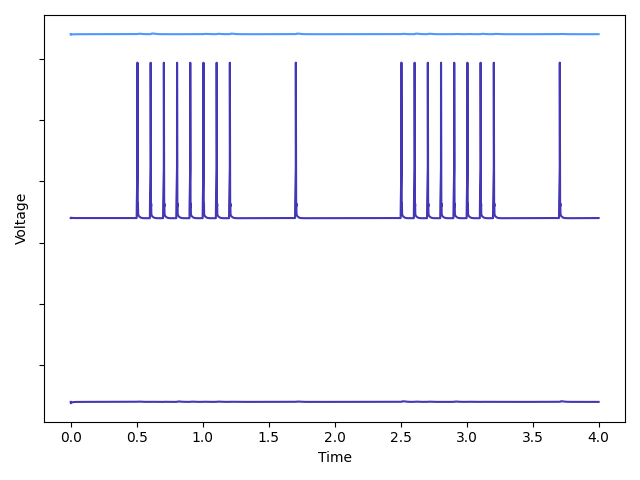

Saving to figure Network-voltage-trace-6-iSPN-dSPN-colour.pdf


In [3]:
%matplotlib notebook
pr.plot_trace_overview()

We can also plot the individual post synaptic traces, with the current pulses marked.

Loading 13 neurons with 274 synapses and 43 gap junctions
Loading networks/pair_recording_simulation/simulation/network-output-6.txt
!!! Excluding first 0.25 s from the plot
Plotting traces: [9]
Plotted 1 traces (total 3)


<IPython.core.display.Javascript object>


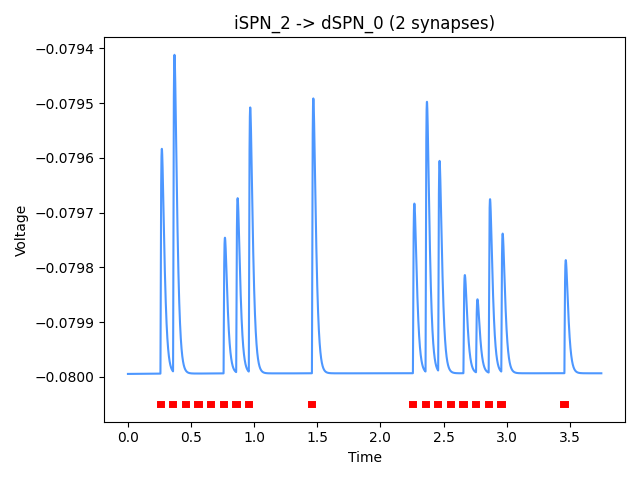

Saving to figure Current-injection-pre-4-post-9.pdf
Loading 13 neurons with 274 synapses and 43 gap junctions
Loading networks/pair_recording_simulation/simulation/network-output-6.txt
!!! Excluding first 0.25 s from the plot
Plotting traces: [11]
Plotted 1 traces (total 3)


<IPython.core.display.Javascript object>


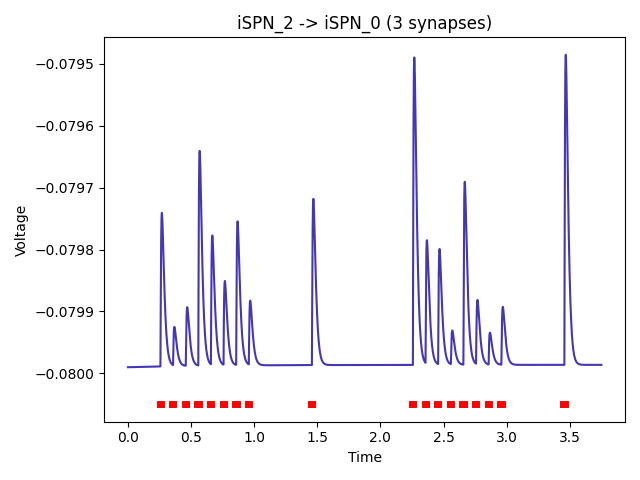

Saving to figure Current-injection-pre-4-post-11.pdf


In [4]:
%matplotlib notebook
pr.plot_traces()

The code below shows how you can use PlotTraces to load the voltage traces and plot the data yourself if you do not have the PairRecording object available anymore.

In [6]:
%matplotlib notebook
from snudda.plotting import PlotTraces
pt = PlotTraces(file_name=os.path.join(network_path,"simulation","network-output-6.txt"),
                network_file=os.path.join(network_path, "network-synapses.hdf5"))

Loading 13 neurons with 274 synapses and 43 gap junctions
Loading networks/pair_recording_simulation/simulation/network-output-6.txt


Plotting traces: [11, 4, 9]
Plotted 3 traces (total 3)


<IPython.core.display.Javascript object>


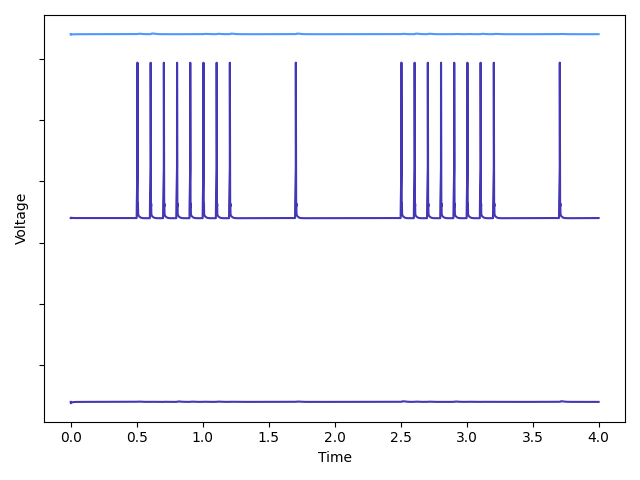

Saving to figure Network-voltage-trace-6-iSPN-dSPN-colour.pdf


<IPython.core.display.Javascript object>


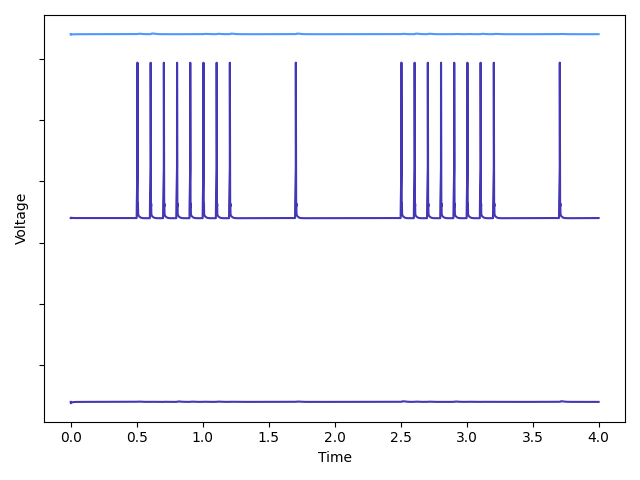

In [7]:
pt.plot_traces([x for x in pt.voltage])

Plotting traces: [11]
Plotted 1 traces (total 3)


<IPython.core.display.Javascript object>


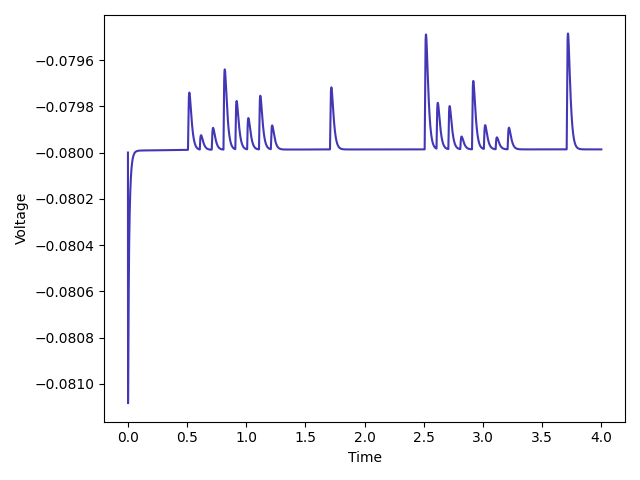

Saving to figure Network-voltage-trace-6-iSPN-colour.pdf


<IPython.core.display.Javascript object>


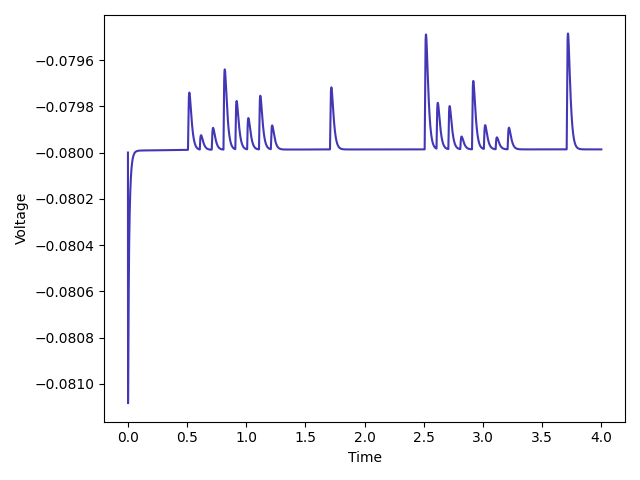

In [8]:
pt.plot_traces([11], offset=0)

Plotting traces: [12]
Plotted 1 traces (total 3)


<IPython.core.display.Javascript object>


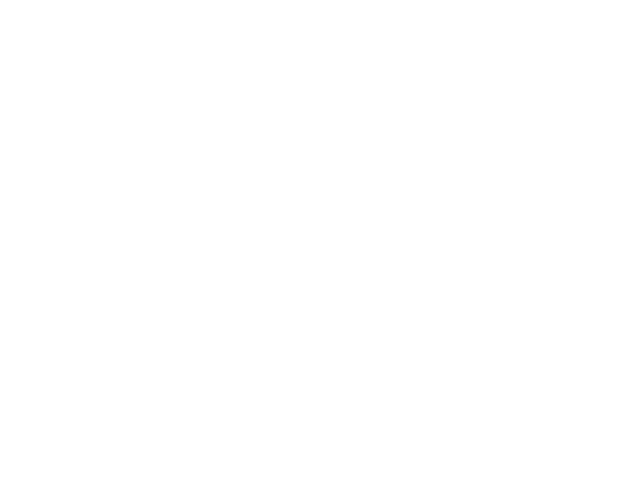

Missing data for trace 12


In [9]:
pt.plot_traces([12], offset=0)

Plotting traces: [11, 4, 9]
Plotted 3 traces (total 3)


<IPython.core.display.Javascript object>


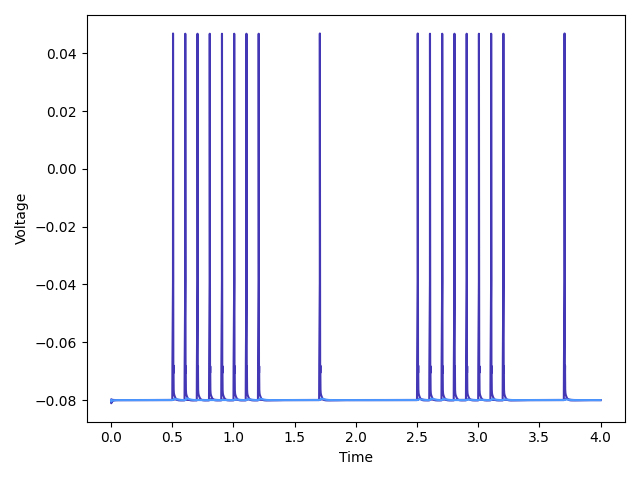

Saving to figure Network-voltage-trace-6-iSPN-dSPN-colour.pdf


<IPython.core.display.Javascript object>


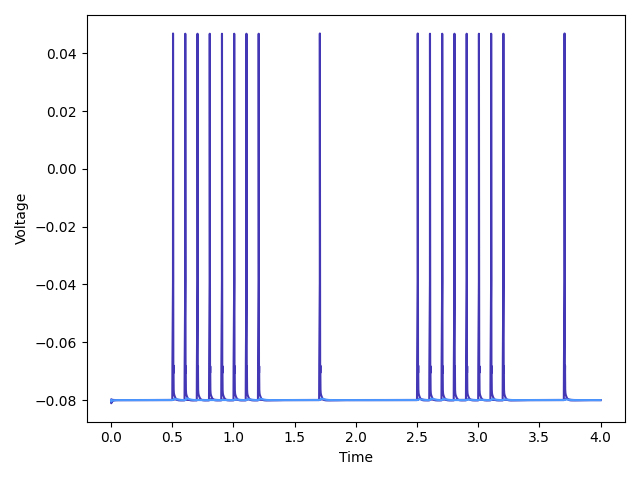

In [10]:
pt.plot_traces([x for x in pt.voltage], offset=0)

<IPython.core.display.Javascript object>


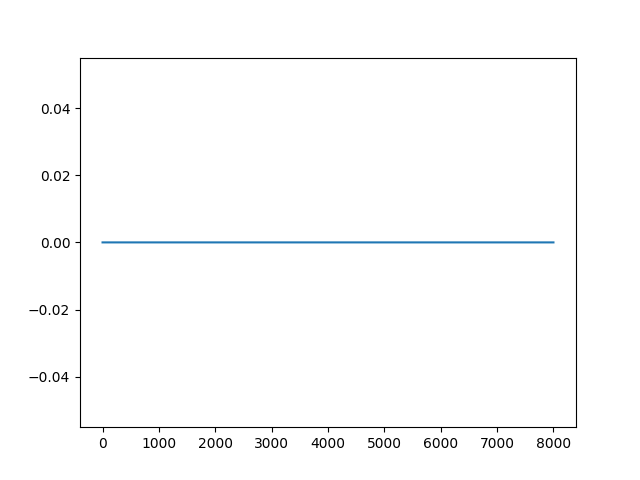

In [11]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot([x for x in pr.synapse_currents[0][2]])
plt.show()

In [12]:
pr.synapse_currents[0][2]

Vector[14673]

In [13]:
pr.neurons[4].name

'iSPN_2'